# New Section


**TASK #01 SGD for linear regression.**

SGD Coefficients: [56.92685551]
SGD Intercept: [99.73440497]
Mean Squared Error: 97.51930917189244


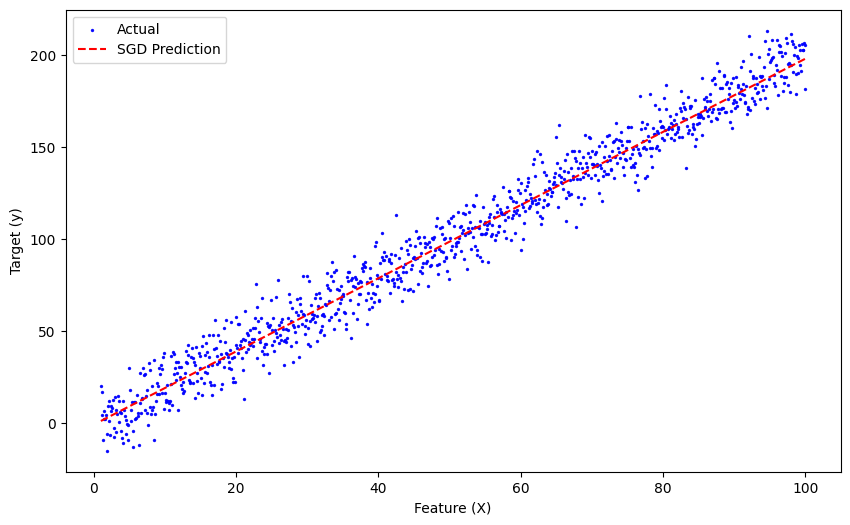

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def train_sgd_linear_regression():
    # Generate a dataset of 1000 points
    X = np.linspace(1, 100, 1000).reshape(-1, 1)
    y = 2 * X.flatten() + np.random.randn(1000) * 10

    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #  SGD Regressor
    sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='constant')

    # training
    sgd_reg.fit(X_scaled, y)

    # Predict values
    y_pred = sgd_reg.predict(X_scaled)

    #  mean squared error
    mse = mean_squared_error(y, y_pred)

    print("SGD Coefficients:", sgd_reg.coef_)
    print("SGD Intercept:", sgd_reg.intercept_)
    print("Mean Squared Error:", mse)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual', alpha=0.9, s=2)  # Clear and visible points
    plt.plot(X, y_pred, color='red', linestyle='dashed', label='SGD Prediction')
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()

train_sgd_linear_regression()


**TASK #02 stochastic, Batch and Mini-batch**


Comparison of Model Parameters and MSEs:
Algorithm                 Coefficients         MSE       
Stochastic GD             58.08111486650532    96.1895   
Batch GD                  57.559666280950395   95.6699   
Mini-Batch GD             57.56302625746852    95.6699   


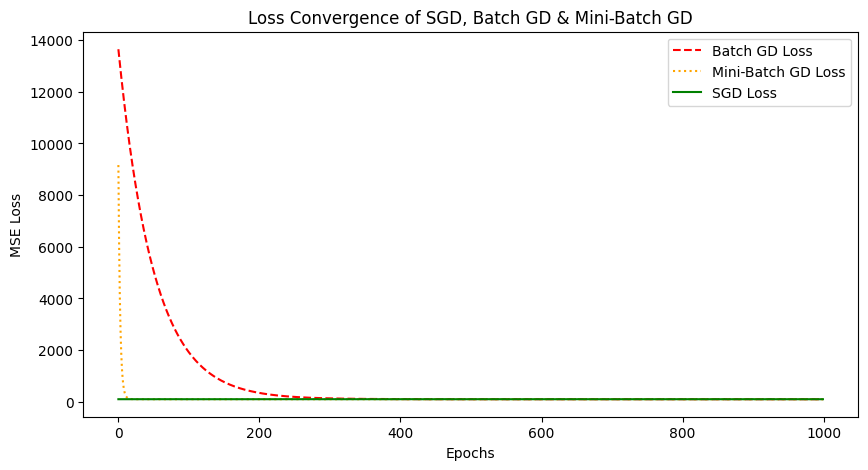

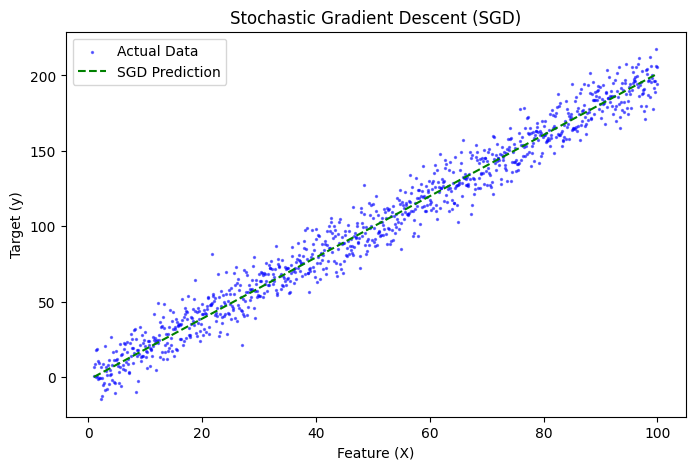

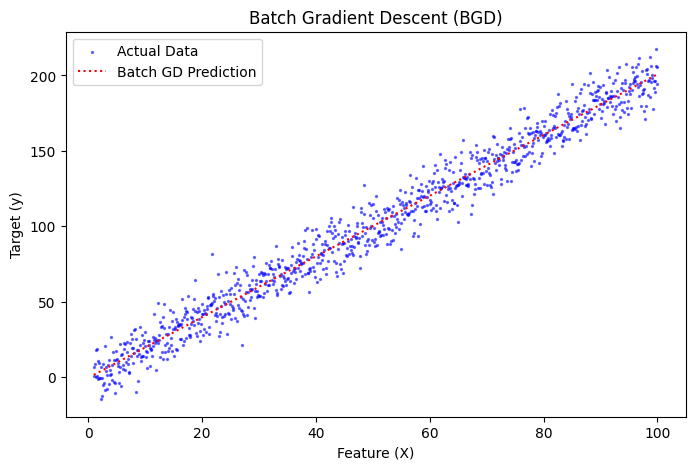

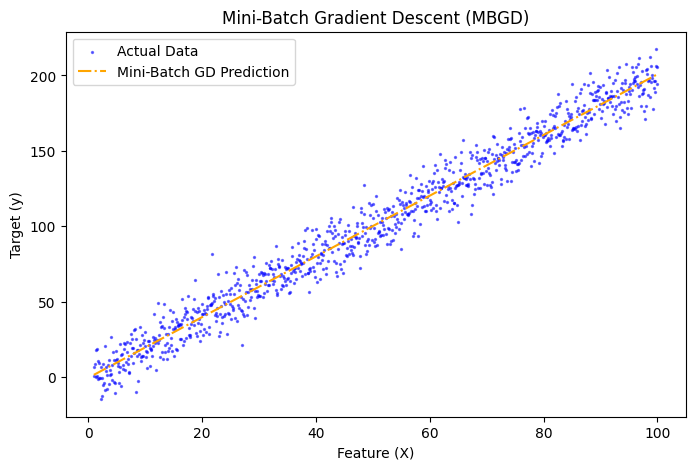

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#data set with noise
np.random.seed(42)
X = np.linspace(1, 100, 1000).reshape(-1, 1)
y = 2 * X.flatten() + np.random.randn(1000) * 10

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- Stochastic Gradient Descent (SGD) -------------------- #
sgd_loss_history = []
sgd = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate='constant', warm_start=True)

for _ in range(1000):  # iterate 1000 times
    sgd.fit(X_scaled, y)
    y_pred_sgd = sgd.predict(X_scaled)
    mse = mean_squared_error(y, y_pred_sgd)
    sgd_loss_history.append(mse)

mse_sgd = sgd_loss_history[-1]

# -------------------- Batch Gradient Descent (BGD) -------------------- #
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)  #  weights
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, theta) + bias
        error = y_pred - y

        #  gradients (using full dataset)
        grad_theta = (1/m) * np.dot(X.T, error)
        grad_bias = (1/m) * np.sum(error)

        # Update weights
        theta -= lr * grad_theta
        bias -= lr * grad_bias

        # Compute loss
        mse = np.mean(error**2)
        loss_history.append(mse)

    return theta, bias, loss_history

theta_bgd, bias_bgd, loss_bgd = batch_gradient_descent(X_scaled, y)
y_pred_batch = np.dot(X_scaled, theta_bgd) + bias_bgd
mse_batch = mean_squared_error(y, y_pred_batch)

# -------------------- Mini-Batch Gradient Descent (MBGD) -------------------- #
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=50):
    m, n = X.shape
    theta = np.zeros(n)  #  weights
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        # Shuffle dataset
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = np.dot(X_batch, theta) + bias
            error = y_pred - y_batch

            #  gradients (mini-batch)
            grad_theta = (1/batch_size) * np.dot(X_batch.T, error)
            grad_bias = (1/batch_size) * np.sum(error)

            # Update weights
            theta -= lr * grad_theta
            bias -= lr * grad_bias

        # Compute loss
        y_pred_full = np.dot(X, theta) + bias
        mse = np.mean((y_pred_full - y)**2)
        loss_history.append(mse)

    return theta, bias, loss_history

theta_mbgd, bias_mbgd, loss_mbgd = mini_batch_gradient_descent(X_scaled, y)
y_pred_mini_batch = np.dot(X_scaled, theta_mbgd) + bias_mbgd
mse_mini_batch = mean_squared_error(y, y_pred_mini_batch)

# -------------------- Print Results -------------------- #
print("\nComparison of Model Parameters and MSEs:")
print("="*65)
print("{:<25} {:<20} {:<10}".format("Algorithm", "Coefficients", "MSE"))
print("="*65)
print("{:<25} {:<20} {:<10.4f}".format("Stochastic GD", str(sgd.coef_[0]), mse_sgd))
print("{:<25} {:<20} {:<10.4f}".format("Batch GD", str(theta_bgd[0]), mse_batch))
print("{:<25} {:<20} {:<10.4f}".format("Mini-Batch GD", str(theta_mbgd[0]), mse_mini_batch))
print("="*65)

# -------------------- Plot Loss Convergence -------------------- #
plt.figure(figsize=(10, 5))
plt.plot(loss_bgd, label="Batch GD Loss", linestyle='dashed', color='red')
plt.plot(loss_mbgd, label="Mini-Batch GD Loss", linestyle='dotted', color='orange')
plt.plot(sgd_loss_history, label="SGD Loss", linestyle='solid', color='green')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Loss Convergence of SGD, Batch GD & Mini-Batch GD")
plt.show()

# -------------------- Plot Predictions Separately -------------------- #
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5, s=2)
plt.plot(X, y_pred_sgd, color='green', linestyle='dashed', label='SGD Prediction')
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.title("Stochastic Gradient Descent (SGD)")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5, s=2)
plt.plot(X, y_pred_batch, color='red', linestyle='dotted', label='Batch GD Prediction')
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.title("Batch Gradient Descent (BGD)")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5, s=2)
plt.plot(X, y_pred_mini_batch, color='orange', linestyle='dashdot', label='Mini-Batch GD Prediction')
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.title("Mini-Batch Gradient Descent (MBGD)")
plt.show()


**TASK #03 learning rates and momentum**

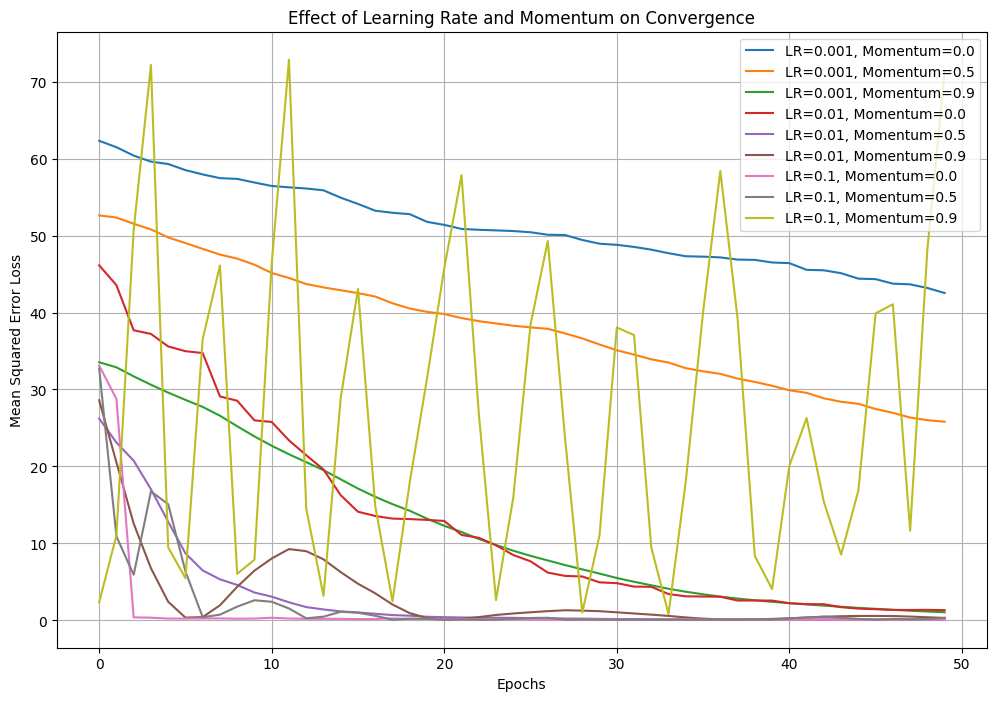

In [64]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
N = 1000
x = 2 * np.random.rand(N)
true_w, true_b = 4.5, 1.2
y = true_w * x + true_b + np.random.randn(N) * 0.3

# Loss function: Mean Squared Error
def compute_loss(w, b, x, y):
    return np.mean((y - (w * x + b)) ** 2)

# SGD with Momentum
def sgd_momentum(x, y, alpha=0.01, beta=0.9, epochs=50):
    N = len(x)
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0  # Initialize momentum
    losses = []

    for epoch in range(epochs):
        idx = np.random.randint(0, N)  # random sample
        x_i, y_i = x[idx], y[idx]
        y_pred = w * x_i + b
        dw = -2 * x_i * (y_i - y_pred)
        db = -2 * (y_i - y_pred)

        #  momentum update
        v_w = beta * v_w + alpha * dw
        v_b = beta * v_b + alpha * db
        w -= v_w
        b -= v_b

        losses.append(compute_loss(w, b, x, y))  # Store loss per epoch
    return w, b, losses

# Experiment with different learning rates and momentum values
learning_rates = [0.001, 0.01, 0.1]
momentum_values = [0.0, 0.5, 0.9]
results = {}

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    for momentum in momentum_values:
        w, b, losses = sgd_momentum(x, y, alpha=lr, beta=momentum, epochs=50)
        label = f"LR={lr}, Momentum={momentum}"
        results[label] = losses
        plt.plot(losses, label=label)

# Plot Loss vs Epochs for different settings
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Effect of Learning Rate and Momentum on Convergence")
plt.legend()
plt.grid(True)
plt.show()
